# 文件读写

## ***open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)***
- 创建对象进行IO传输，用于处理文本类文件

### 参数描述
- file: 必需，文件路径（相对或者绝对路径）。
- mode: 可选，文件打开模式
  > `r`，默认模式，以只读方式打开文件。文件的指针将会放在文件的开头。如果该文件不存在，将抛出错误
  
  > `r+`，打开一个文件用于读写。文件指针将会放在文件的开头。如果该文件不存在，将抛出错误

  > `w`，打开一个文件只用于写入。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件

  > `w+`，打开一个文件用于读写。如果该文件已存在则打开文件，并从开头开始编辑，即原有内容会被删除。如果该文件不存在，创建新文件

  > `a`，打开一个文件用于追加。如果该文件已存在，文件指针将会放在文件的结尾。也就是说，新的内容将会被写入到已有内容之后。如果该文件不存在，创建新文件进行写入
  
  > `a+`，打开一个文件用于读写。如果该文件已存在，文件指针将会放在文件的结尾。文件打开时会是追加模式。如果该文件不存在，创建新文件用于读写

- buffering: 设置缓冲
- encoding: 一般使用utf8
- errors: 报错级别
- newline: 区分换行符
- closefd: 传入的file参数类型
- opener: 设置自定义开启器，开启器的返回值必须是一个打开的文件描述符

### 方法描述
指针
- tell(): 返回当前指针位置
- seek(偏移量, [起始位置]): 移动指针，起始位置有三种取值，0是文件开头，1当前位置，2文件末尾

读
- read([size]): 读给定字节数的数据，默认或负值读取全部
- readline([size]): 读取整行包括"\n"字符
- readlines([sizeint]): 读取所有行返回列表，若sizeint>0将一次读制定字节数据缓解读取压力

写
- flush(): 立刻把缓冲区的数据写入文件
- write(str): 将字符串写入文件，返回值是写入字符串长度
- writelines(sequence): 可将字符串序列写入文件，如果需要换行则需加入换行符

关闭
- close(): 关闭文件停止读写

### 标准工作流程示例
- 打开文件IO接口（指针在文件开头） -> 读取文件内容（移动指针读写文件） -> 关闭文件IO接口（指针会重新回到开头）
```python
# 读文本内容
try:
    text_file = open("./xxxx.txt", "r")
    text_data = text_file.read()
finally:
    if text_file:
        text_file.close()

with open("./xxxx.txt", "w") as text_file:
    text_file.writelines(text_list)
```

In [2]:
import matplotlib.pyplot as plot
import numpy as np
import os
import re

In [3]:
with open("/Users/WangHao/Desktop/TODO/互联网资讯收集/出生人口数.txt", "r") as text_file:
    text_data = text_file.read()

In [4]:
sub_text = re.findall(r'.*\n', text_data)
data_list = [[
    int(string_line.split(":")[0][:-1]),
    int(re.findall(r'[0-9]*万', string_line)[0][:-1])
] for string_line in sub_text]

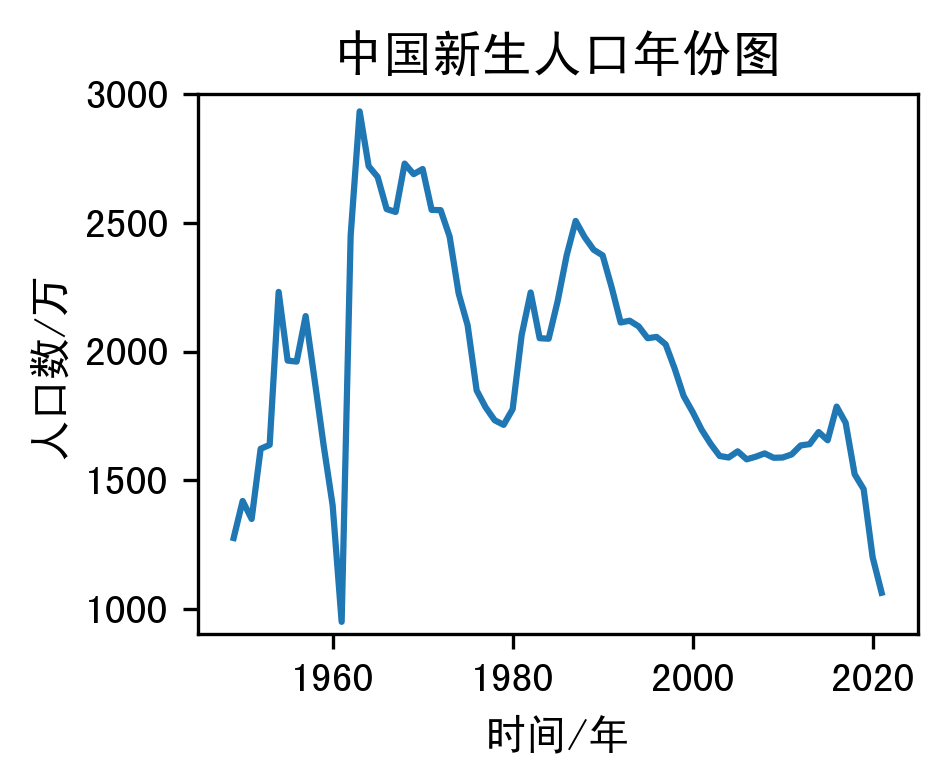

In [6]:
fig = plot.figure(2, figsize=(4, 3), dpi=300)
left, bottom, right, top = 0.3, 0.3, 0.6, 0.6
ax = fig.add_axes([left, bottom, right, top])
ax.set(xlim=[1945, 2025],
       ylim=[900, 3000],
       title='中国新生人口年份图',
       ylabel='人口数/万',
       xlabel='时间/年')

inputs_x_y = np.array(data_list)
plot.plot(inputs_x_y[:, 0], inputs_x_y[:, 1])
plot.show()